In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem principal
main_image = cv2.imread('..\\FFVI\\Dialog\\texto_baixo.png')
# Carregar a imagem do template que você deseja encontrar na imagem principal
template = cv2.imread('..\\FFVI\\Dialog\\textbox.png')


# Calcular a largura e a altura da imagem de entrada
largura, comprimento, _ = main_image.shape

# Calcular a nova largura e altura do template
nova_largura_template = int(largura*1.1)
nova_altura_template = int(0.30 * comprimento)  # 20% do comprimento da imagem

# Redimensionar o template para a nova largura e altura
template_redimensionado = cv2.resize(main_image, (nova_largura_template, nova_altura_template))

#nova_largura = 500
#nova_altura = 170

# Redimensionar a imagem
#template = cv2.resize(template, (nova_largura, nova_altura))

#plt.imshow(main_image)




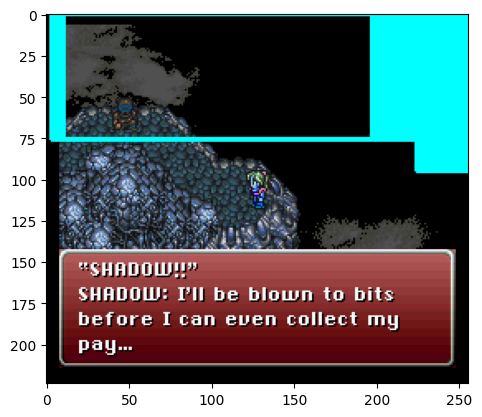

In [10]:
# Converter as imagens para escala de cinza
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_redimensionado, cv2.COLOR_BGR2GRAY)

#copia da imagem para não ter que ficar recarregando
img = main_image.copy()

main_gray = cv2.GaussianBlur(main_gray, (9, 9), 0)
template_gray = cv2.GaussianBlur(template_gray, (9, 9), 0)


# Detectar os contornos na imagem do template
template_contours, _ = cv2.findContours(template_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterar sobre os contornos
for template_contour in template_contours:
    # Encontrar a caixa delimitadora para o contorno
    x, y, w, h = cv2.boundingRect(template_contour)
    # Recortar a região correspondente na imagem principal
    roi = main_gray[y:y+h, x:x+w]

    # Realizar o template matching dentro da região recortada
    res = cv2.matchTemplate(roi, template_gray, cv2.TM_SQDIFF)
    # Definir um limite de confiança para os resultados
    threshold = 0.1
    # Encontrar a localização onde a confiança é maior que o limite
    loc = np.where(res >= threshold)

    # Desenhar um retângulo ao redor das correspondências encontradas
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, (pt[0]+x, pt[1]+y), (pt[0]+x+w, pt[1]+y+h), (0, 255, 255), 2)

# Exibir a imagem com os retângulos desenhados ao redor das correspondências
#img_cor = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img)


In [96]:
# query = cv2.imread('FFVI\\Dialog\\texto_baixo.png')
# train = cv2.imread('FFVI\\Dialog\\textbox.png')

# query = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
# train = cv2.cvtColor(train, cv2.COLOR_BGR2GRAY)

# query_height, query_width = query.shape
# train_height, train_width = train.shape

# plt.imshow(query)

In [94]:
# query = cv2.imread('FFVI\\Dialog\\texto_baixo.png')
# train = cv2.imread('FFVI\\Dialog\\textbox.png')

# query = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
# train = cv2.cvtColor(train, cv2.COLOR_BGR2GRAY)

# #train = cv2.GaussianBlur(train, (9, 9), 0)
# #train = cv2.GaussianBlur(train, (9, 9), 0)
# #train = cv2.GaussianBlur(train, (9, 9), 0)


# train = cv2.resize(train, (nova_largura_template, nova_altura_template))

# query_height, query_width = query.shape
# train_height, train_width = train.shape

# sift = cv2.SIFT_create()

# train_keypoints, train_descriptors = sift.detectAndCompute(train, None)
# query_keypoints, query_descriptors = sift.detectAndCompute(query, None)

# matcher = cv2.FlannBasedMatcher()

# matches = matcher.knnMatch(query_descriptors, train_descriptors, k=2)

# # A binary mask that we will need to
# # avoid drawing the discarded matches.
# matches_mask = []

# # A list of the non-discarded matches.
# good_matches = []

# # Because we passed k=2 to knnMatch,
# # each element is a tuple of size two.
# for first, second in matches:

#     # If the first distance is above 80% of
#     # the second distance, both are discarded.
#     if first.distance > 1 * second.distance:
#         matches_mask.append((0, 0))

#     # Otherwise, only the second is discarded.
#     else:
#         matches_mask.append((1, 0))
#         good_matches.append(first)

# matches_output = cv2.drawMatchesKnn(query, query_keypoints, train, train_keypoints, matches, None, matchesMask=matches_mask)

# plt.imshow(matches_output)


In [95]:

# pose_src = []
# pose_dst = []

# for first in good_matches:
#     pose_src.append(train_keypoints[first.trainIdx].pt)
#     pose_dst.append(query_keypoints[first.queryIdx].pt)

# # The findHomography method expects points
# # given as NumPy arrays, so we need this.
# pose_src = np.array(pose_src)
# pose_dst = np.array(pose_dst)

# # There are two outputs: the homography and
# # a binary mask that indicates which matches
# # are outliers with respect to it. We are
# # not interested in this mask, so we use _.
# H, _ = cv2.findHomography(pose_src, pose_dst, cv2.RANSAC)

# # The rectangle points must use the (x, y) ordering,
# # because OpenCV really loves to make you confused.
# rectangle_src = [
#     (0, 0),
#     (0, train_height),
#     (train_width, train_height),
#     (train_width, 0),
# ]

# # OpenCV is also picky. The method expects a NumPy
# # floating-point array and, due to some weirdness
# # of the Python bindings, it also needs an extra
# # dimension. This is why we wrap it in an extra [].
# rectangle_src = np.array([rectangle_src], dtype=float)

# # In a perfect world, this is the only line we
# # would need. Alas, we sadly do not live in one.
# rectangle_dst = cv2.perspectiveTransform(rectangle_src, H)

# # Reversing the pickiness. We use [0] to remove
# # the extra dimension and a combination of round
# # and astype to convert the points to integers.
# rectangle_dst = rectangle_dst[0].round().astype(int)

# color = (0, 255, 0)

# thickness = 2

# rectangle_output = cv2.cvtColor(query, cv2.COLOR_GRAY2BGR)

# cv2.line(rectangle_output, rectangle_dst[0], rectangle_dst[1], color, thickness)
# cv2.line(rectangle_output, rectangle_dst[1], rectangle_dst[2], color, thickness)
# cv2.line(rectangle_output, rectangle_dst[2], rectangle_dst[3], color, thickness)
# cv2.line(rectangle_output, rectangle_dst[3], rectangle_dst[0], color, thickness)

# plt.imshow(rectangle_output)

In [92]:
# res = cv2.matchTemplate(query, template, cv2.TM_CCOEFF_NORMED)
# threshold = 0.8
# loc = np.where(res >= threshold)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'cv::matchTemplate'


In [ ]:
def find_blu(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Definir o intervalo de cores para o chão (mais restrito)
    # Calcular o histograma da matiz (H)
    hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])
    # Encontrar o valor de matiz (H) mais comum
    valor_h_comum = np.argmax(hist_h)
    valor_s_comum = np.argmax(hist_s)
    valor_v_comum = np.argmax(hist_v)
    # Definir os limites do intervalo de cor baseados no valor de matiz (H) mais comum
    tolerancia = 50  # Define a tolerância para a cor mais comum
    h_min = max(0, valor_h_comum - tolerancia)
    h_max = min(255, valor_h_comum + tolerancia)
    s_min = max(0, valor_s_comum - tolerancia)
    s_max = min(255, valor_s_comum + tolerancia)
    v_min = max(0, valor_v_comum - tolerancia)
    v_max = min(255, valor_v_comum + tolerancia)

    imagem_blur = cv2.GaussianBlur(hsv, (13, 13), 0)
    imagem_blur = cv2.GaussianBlur(imagem_blur, (11, 11), 0)
    imagem_blur = cv2.GaussianBlur(imagem_blur, (7, 7), 0)
    imagem_blur = cv2.GaussianBlur(imagem_blur, (5, 5), 0)
    imagem_blur = cv2.GaussianBlur(imagem_blur, (3, 3), 0)

    lowerb = np.array([h_min, s_min, v_min])
    upperb = np.array([h_max, s_max, v_max])

    # Criar a máscara usando os limites do intervalo de cor
    mascara = cv2.inRange(hsv, lowerb, upperb)

    kernel = np.ones((3,3), np.uint8)
    imagem_dilatada = cv2.dilate(mascara, kernel, iterations=8)

    kernel = np.ones((3,3), np.uint8)
    imagem_erodida = cv2.erode(imagem_dilatada, kernel, iterations=10)
    imagem_invertida = cv2.bitwise_not(imagem_erodida)

    contorno = cv2.bitwise_and(cv2_img, cv2_img, mask=imagem_invertida)

    plt.figure()
    plt.imshow(contorno, cmap="grey")
    plt.axis('off')
